In [27]:
from google.colab import files
uploaded = files.upload()

# Save the uploaded file to the Colab environment
for filename, content in uploaded.items():
  with open(filename, 'wb') as f:
    f.write(content)

Saving FSI_2018_2023.xlsx to FSI_2018_2023.xlsx


In [28]:
import pandas as pd

# Excel dosyası
xlsx = pd.ExcelFile("FSI_2018_2023.xlsx")

# Yıllar
years = ['2018', '2019', '2020', '2021', '2022', '2023']
df_list = []

for year in years:
    df = pd.read_excel(xlsx, sheet_name=year)
    df['Year'] = int(year)
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)

# Sadece gerekli sütunlar: ülke adı, toplam skor ve yıl
df_all = df_all[['Country', 'Total', 'Year']]

# Eksik veri kontrolü
print("Eksik değer sayısı:")
print(df_all.isna().sum())

# İlk 5 satır
df_all.head()

Eksik değer sayısı:
Country    0
Total      0
Year       0
dtype: int64


,Country,Total,Year
0,South Sudan,113.357315,2018
1,Somalia,113.200796,2018
2,Yemen,112.671504,2018
3,Syria,111.393031,2018
4,Central African Republic,111.126345,2018


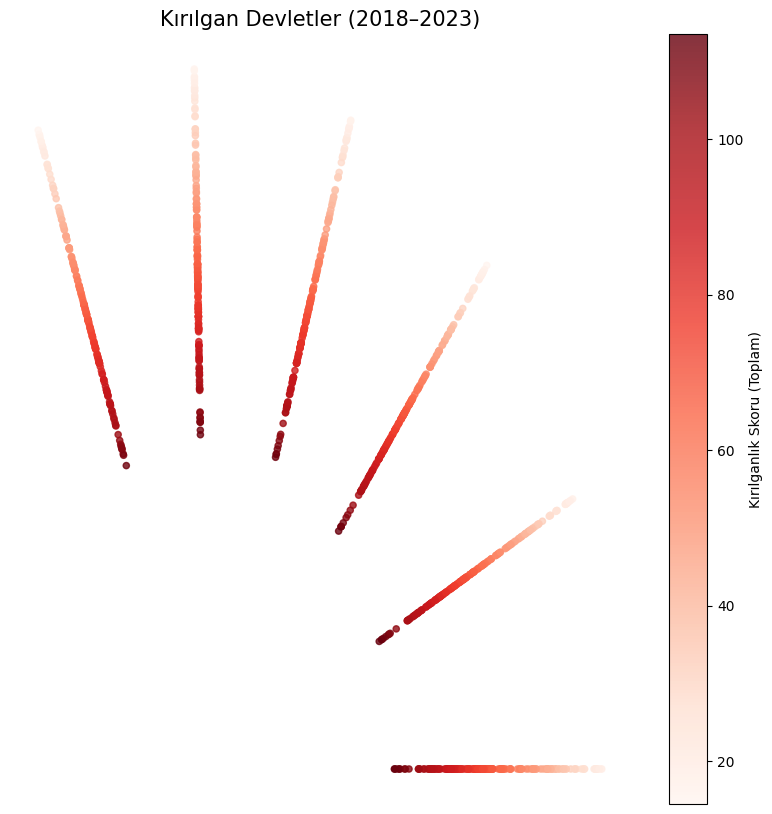

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Ülkeleri sırala ve her ülke için yıl sırasına göre ID ata
df_all = df_all.sort_values(by=["Country", "Year"]).reset_index(drop=True)
df_all["frame_id"] = df_all.groupby("Country").cumcount()

# spiral koordinatlarını hesapla
theta = df_all["frame_id"] * 0.4  # Açısal artış
r = 200 - df_all["Total"]         # Daha kırılgan ülke merkeze daha yakın

df_all["x"] = r * np.cos(theta)
df_all["y"] = r * np.sin(theta)

# Grafik
plt.figure(figsize=(10, 10))
scatter = plt.scatter(
    df_all["x"], df_all["y"],
    c=df_all["Total"],
    cmap="Reds",
    alpha=0.8,
    s=20
)

plt.axis("off")
plt.title("Kırılgan Devletler (2018–2023)", fontsize=15)
plt.colorbar(scatter, label="Kırılganlık Skoru (Toplam)")
plt.show()


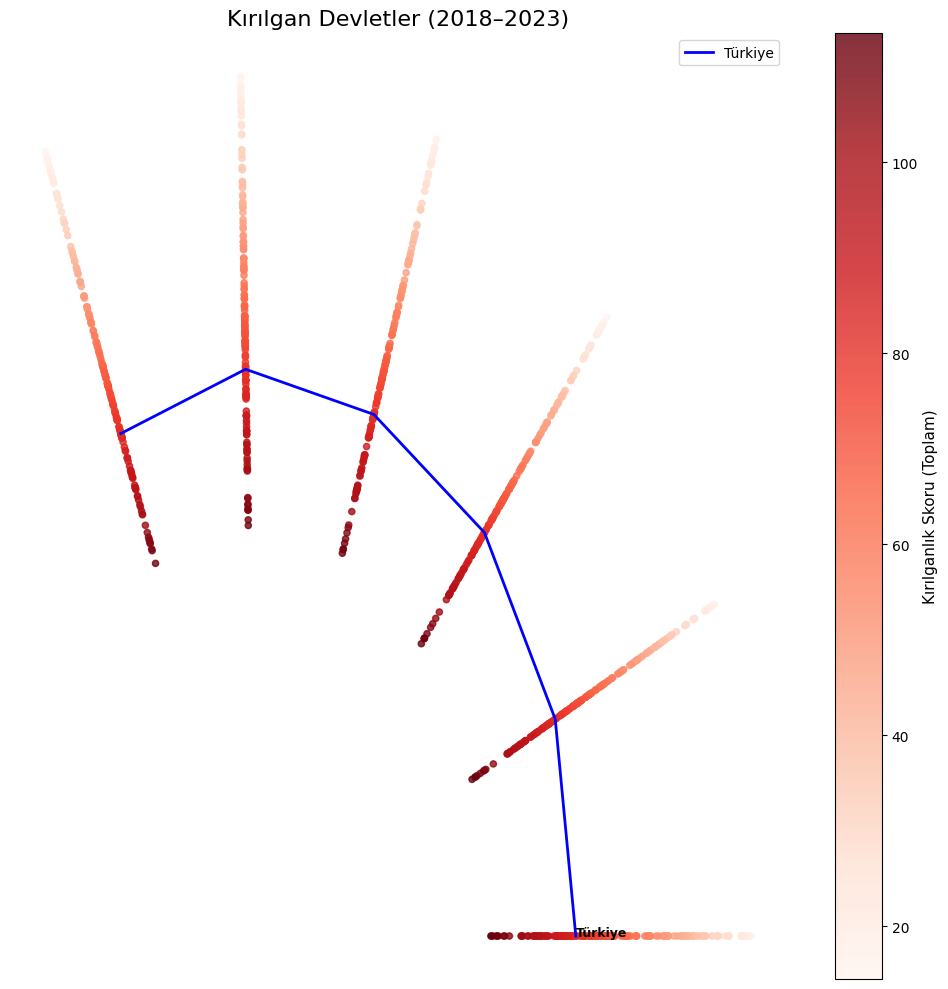

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Örnek veri yükleme (sen kendi yolunu belirle)
# df_all = pd.read_excel("/content/FSI 2018-2023.xlsx")
# Kolonlar: 'Country', 'Year', 'Total'

# Ülkeleri sırala ve her ülke için yıl sırasına göre ID ata
df_all = df_all.sort_values(by=["Country", "Year"]).reset_index(drop=True)
df_all["frame_id"] = df_all.groupby("Country").cumcount()

# Spiral koordinatları hesapla
theta = df_all["frame_id"] * 0.4  # Açısal artış
r = 200 - df_all["Total"]         # Düşük skor = merkeze yakın

df_all["x"] = r * np.cos(theta)
df_all["y"] = r * np.sin(theta)

# Türkiye verisi
turkey = df_all[df_all["Country"] == "Turkey"]

# Grafik
plt.figure(figsize=(10, 10))
scatter = plt.scatter(
    df_all["x"], df_all["y"],
    c=df_all["Total"],
    cmap="Reds",
    alpha=0.8,
    s=20
)

# Türkiye çizgisi
plt.plot(
    turkey["x"], turkey["y"],
    color="blue", linewidth=2, label="Türkiye"
)
plt.text(
    turkey["x"].iloc[0], turkey["y"].iloc[0],
    "Türkiye", fontsize=9, weight="bold"
)

# Grafik ayarları
plt.axis("off")
plt.title("Kırılgan Devletler (2018–2023)", fontsize=16)
cbar = plt.colorbar(scatter)
cbar.set_label("Kırılganlık Skoru (Toplam)", fontsize=11)
plt.legend()
plt.tight_layout()
plt.show()


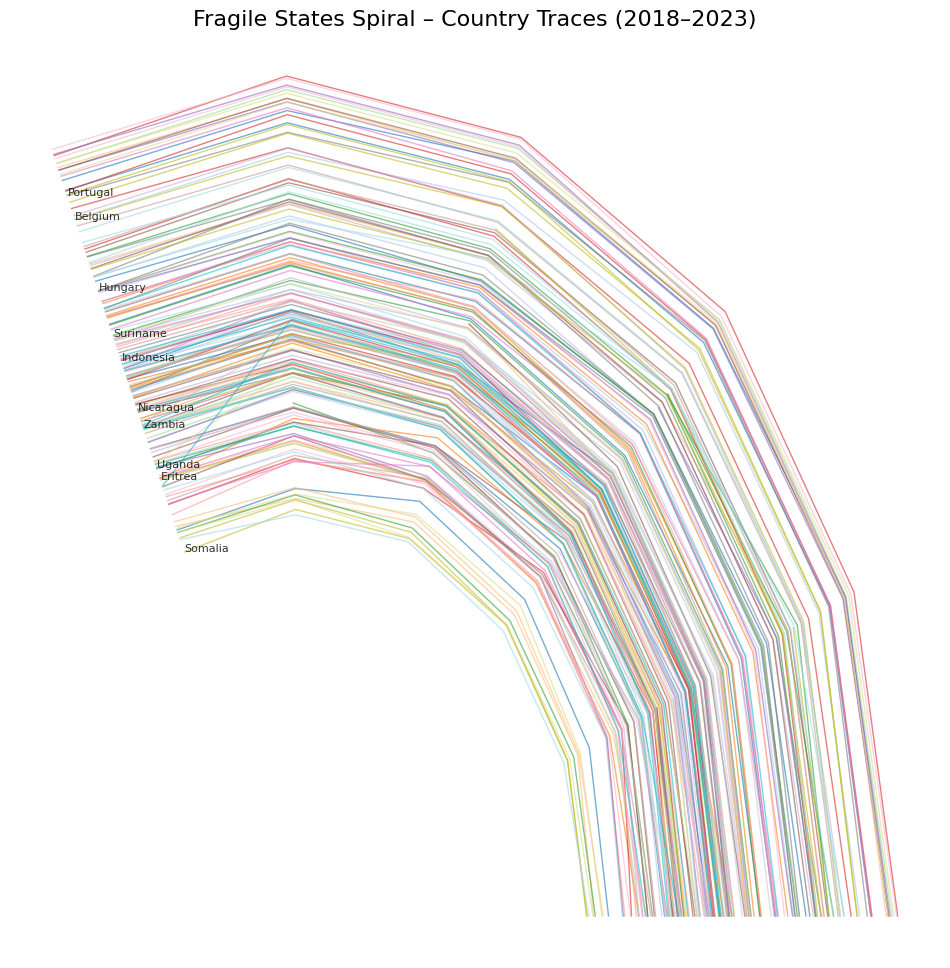

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Her ülkeye farklı renk
countries = df_all['Country'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(countries)))
color_dict = dict(zip(countries, colors))

# Renk sütunu
df_all['color'] = df_all['Country'].map(color_dict)

# Grafik çizimi
plt.figure(figsize=(12, 12))

for country in countries:
    country_data = df_all[df_all['Country'] == country]
    plt.plot(country_data["x"], country_data["y"], color=color_dict[country], alpha=0.6, linewidth=1)

sampled_countries = df_all['Country'].drop_duplicates().sample(10, random_state=42)

for country in sampled_countries:
    country_df = df_all[(df_all['Country'] == country)]
    last_point = country_df.iloc[-1]
    plt.text(last_point['x'], last_point['y'], country, fontsize=8, alpha=0.8)

plt.axis("off")
plt.title("Fragile States Spiral – Country Traces (2018–2023)", fontsize=16)
plt.show()


In [40]:
import pandas as pd

xlsx = pd.ExcelFile("FSI_2018_2023.xlsx")

years = ["2018", "2019", "2020", "2021", "2022", "2023"]
df_list = []

for year in years:
    df_year = pd.read_excel(xlsx, sheet_name=year)
    df_year['Year'] = int(year)
    df_list.append(df_year)

df_all = pd.concat(df_list, ignore_index=True)

df_all.head()

numeric_cols = df_all.select_dtypes(include=['float64']).columns

# virgülden sonra tek basamağa yuvarla
for col in numeric_cols:
    df_all[col] = df_all[col].round(1)

df_all.head()


,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,South Sudan,2018,1st,113.4,10.0,9.7,9.7,10.0,8.9,6.3,10.0,9.9,9.2,10.0,10.0,9.6,NaN
1,Somalia,2018,2nd,113.2,9.7,10.0,9.0,8.9,9.3,9.5,9.1,9.3,9.6,10.0,9.7,9.1,NaN
2,Yemen,2018,3rd,112.7,9.9,10.0,9.5,9.6,8.2,7.2,9.7,9.7,9.8,9.6,9.5,10.0,NaN
3,Syria,2018,4th,111.4,9.9,9.9,9.9,8.5,7.8,8.1,9.9,9.3,9.9,8.2,10.0,10.0,NaN
4,Central African Republic,2018,5th,111.1,9.1,9.7,8.8,8.8,9.8,7.4,9.4,10.0,9.4,9.3,10.0,9.5,NaN


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_all)

https://docs.google.com/spreadsheets/d/15gZKBxrCu5RhWcI5gW5ZmsMUncRUHVpf6RItmpqxGrA/edit#gid=0


In [ ]:
df_all.groupby("Year")["Country"].nunique()


,Country
Year,
2018,178
2019,178
2020,178
2021,179
2022,179
2023,179


In [ ]:
years = df_all['Year'].unique()
yearly_countries = {year: set(df_all[df_all["Year"] == year]["Country"]) for year in years}

# eksik veya farklı verileri bul (örnek: 2020’de olan ama 2018’de olmayan)
extra_in_2020 = yearly_countries[2020] - yearly_countries[2018]
print("2020’de eklenen ülkeler:", extra_in_2020)


2020’de eklenen ülkeler: set()


In [10]:
years = sorted(df_all["Year"].unique())
for i in range(len(years) - 1):
    y1, y2 = years[i], years[i + 1]
    s1 = set(df_all[df_all["Year"] == y1]["Country"])
    s2 = set(df_all[df_all["Year"] == y2]["Country"])

    missing = s1 - s2
    added = s2 - s1

    print(f"{y1} >> {y2}:")
    if missing:
        print(f"  - Eksilen: {missing}")
    if added:
        print(f"  + Eklenen: {added}")
    if not missing and not added:
        print("  = Değişiklik yok.")

2018 >> 2019:
  - Eksilen: {'Czech Republic', 'Swaziland'}
  + Eklenen: {'Czechia', 'Eswatini'}
2019 >> 2020:
  - Eksilen: {'Czechia', 'Eswatini'}
  + Eklenen: {'Czech Republic', 'Swaziland'}
2020 >> 2021:
  - Eksilen: {'Macedonia', 'Czech Republic', 'Kyrgyz Republic', 'Israel and West Bank', 'Slovak Republic', 'Cape Verde', 'Swaziland'}
  + Eklenen: {'Cabo Verde', 'Czechia', 'North Macedonia', 'Israel', 'Kyrgyzstan', 'Eswatini', 'Palestine', 'Slovakia'}
2021 >> 2022:
  - Eksilen: {"Cote d'Ivoire", 'Eswatini'}
  + Eklenen: {"Côte d'Ivoire", 'Swaziland'}
2022 >> 2023:
  - Eksilen: {'Cabo Verde', 'Czechia', 'North Macedonia', 'Kyrgyzstan', "Côte d'Ivoire", 'Slovakia'}
  + Eklenen: {'Macedonia', 'Czech Republic', 'Kyrgyz Republic', 'Slovak Republic', 'Cape Verde', "Cote d'Ivoire"}
